In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import os

In [2]:
# product table 가져오기
base_path = os.getcwd()
product = pd.read_csv(base_path + '/product_final.csv', skiprows = [6043, 6568, 7398, 7938, 9025, 10263, 10426, 10904, 11372, 11944, 14111, 14531, 15075, 29905, 31624, 33019, 35747, 35961, 37769, 38104, 38274, 38403])
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44402 entries, 0 to 44401
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  44402 non-null  int64 
 1   gender              44402 non-null  object
 2   masterCategory      44402 non-null  object
 3   subCategory         44402 non-null  object
 4   articleType         44402 non-null  object
 5   baseColour          44387 non-null  object
 6   season              44381 non-null  object
 7   usage               44085 non-null  object
 8   productDisplayName  44395 non-null  object
 9   brand               44395 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.4+ MB


In [3]:
# click_stream_new table
click_stream_new = pd.read_csv(base_path + '/click_stream_final.csv')
click_stream_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   session_id       object 
 1   event_name       object 
 2   event_time       object 
 3   traffic_source   object 
 4   product_id       float64
 5   quantity         int64  
 6   item_price       int64  
 7   payment_status   float64
 8   search_keywords  object 
 9   promo_code       float64
 10  promo_amount     int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.1+ GB


In [4]:
# customer table
customer = pd.read_csv(base_path + '/customer_final.csv')
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   customer_id      100000 non-null  int64 
 1   gender           100000 non-null  object
 2   birthdate        100000 non-null  object
 3   home_location    100000 non-null  object
 4   first_join_date  100000 non-null  object
 5   age_join         100000 non-null  int64 
 6   age_now          100000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 5.3+ MB


In [5]:
# transaction_new
transaction_new = pd.read_csv(base_path + '/transaction_final.csv')
transaction_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   created_at      1254585 non-null  object 
 1   customer_id     1254585 non-null  int64  
 2   booking_id      1254585 non-null  object 
 3   session_id      1254585 non-null  object 
 4   payment_method  1254585 non-null  object 
 5   payment_status  1254585 non-null  int64  
 6   promo_amount    1254585 non-null  int64  
 7   promo_code      1254585 non-null  float64
 8   shipment_fee    1254585 non-null  int64  
 9   total_amount    1254585 non-null  int64  
 10  product_id      1254585 non-null  int64  
 11  quantity        1254585 non-null  int64  
 12  item_price      1254585 non-null  int64  
 13  with_promo      1254585 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 134.0+ MB


# 1. 브랜드 관련 EDA

In [6]:
product.brand.value_counts()

nike        2288
puma        2092
adidas      2079
united      1401
fabindia     750
            ... 
ayaanay        1
swayam         1
levi'si        1
megadeth       1
deniyo         1
Name: brand, Length: 443, dtype: int64

#### 2021년 인도네시아 18세 ~ 55세 설문조사 결과를 토대로 인기있는 상위 10개 브랜드가 이커머스에 입점되어 있는지 확인 

In [7]:
# 이커머스 회사의 고객 타겟층인 18세에서 35세와 다소 차이가 있을 수 있으나, 참고 목적으로 살펴볼 예정
    # 출처 : https://welcon.kocca.kr/cmm/fms/CrawlingFileDown.do?atchFileId=FILE_f016d5ef-6951-4e09-9cf0-8f513a360671&fileSn=1
brand = product.brand.dropna()
for famous_brand in ['adidas', 'h&m', 'converse', 'uniqlo', 'nike', 'eiger', '3second', 'nevada', 'vans', 'cardinal']:
    print(f'{famous_brand} :', len(brand[brand.str.contains(famous_brand)]))

adidas : 2079
h&m : 0
converse : 169
uniqlo : 0
nike : 2288
eiger : 0
3second : 0
nevada : 0
vans : 196
cardinal : 0


In [8]:
# 문제점 : 인도네시아에서 인기있는 브랜드인 adidas, nike를 제외하고 입점이 안되어있거나 제품 수가 매우 적음

# 2. 검색어 관련 EDA (추후 진행)

In [9]:
# 검색 키워드 유니크 값
click_stream_new.search_keywords.unique()

array([nan, 'Dress', "Woman's Bag", 'Trousers', 'Shirts', 'Shoes',
       'Work Bag', 'T-Shirt', 'Hat', 'Second Hand', 'Nike Shoes',
       'Adidas Shoes', 'Watch', 'Sandal', 'House dress', 'Pajamas'],
      dtype=object)

In [10]:
# 검색 키워드가 NaN 값이 아닌 데이터: 1173266
len(click_stream_new) - click_stream_new.search_keywords.isnull().sum()

1173266

In [11]:
# SEARCH라는 이벤트가 있을때만 검색 키워드 존재
click_stream_new.groupby(['search_keywords', 'event_name']).count()

,,session_id,event_time,traffic_source,product_id,quantity,item_price,payment_status,promo_code,promo_amount
search_keywords,event_name,,,,,,,,,
Adidas Shoes,SEARCH,25627,25627,25627,0,25627,25627,0,25627,25627
Dress,SEARCH,333023,333023,333023,0,333023,333023,0,333023,333023
Hat,SEARCH,4844,4844,4844,0,4844,4844,0,4844,4844
House dress,SEARCH,1197,1197,1197,0,1197,1197,0,1197,1197
Nike Shoes,SEARCH,51578,51578,51578,0,51578,51578,0,51578,51578
Pajamas,SEARCH,2268,2268,2268,0,2268,2268,0,2268,2268
Sandal,SEARCH,12787,12787,12787,0,12787,12787,0,12787,12787
Second Hand,SEARCH,224882,224882,224882,0,224882,224882,0,224882,224882
Shirts,SEARCH,167632,167632,167632,0,167632,167632,0,167632,167632


In [12]:
click_stream_new.columns

Index(['session_id', 'event_name', 'event_time', 'traffic_source',
       'product_id', 'quantity', 'item_price', 'payment_status',
       'search_keywords', 'promo_code', 'promo_amount'],
      dtype='object')

In [13]:
# 검색을 많이 한 순서대로 정렬
click_stream_new['search_keywords'].value_counts()

Dress           333023
Second Hand     224882
Shirts          167632
Woman's Bag     128790
T-Shirt         107184
Nike Shoes       51578
Trousers         39748
Work Bag         38677
Shoes            28029
Adidas Shoes     25627
Sandal           12787
Watch             7000
Hat               4844
Pajamas           2268
House dress       1197
Name: search_keywords, dtype: int64

In [14]:
# 번역한 데이터를 바탕으로 키워드 순위 재구성 

# -> 1. 드레스에 대한 수요가 많음
# -> 2. 중고상품에 대한 수요가 많음
# -> 3. Nike, Adidas 신발 수요 많음
# -> 4. Time에 대한 검색 수요가 있음(..?)

In [15]:
click_stream_new.head()

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06 15:54:32.821085+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06 16:03:57.821085+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01 12:05:10.322763+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01 12:06:33.322763+00:00,MOBILE,15315.0,4,313529,NaN,NaN,0.0,0
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01 12:15:29.425431+00:00,MOBILE,NaN,0,0,1.0,NaN,0.0,0


In [69]:
# 2016~2022년까지 매년 월별 전체검색 수, 중고 검색 수, 전체 검색 수 대비 중고 검색 비율
click_stream_new['event_time'] = pd.to_datetime(click_stream_new['event_time'])
click_stream_new['month'] = click_stream_new['event_time'].dt.to_period('M')
click_stream_new['month'] = click_stream_new['month'].astype('str')

# 매년 월별 전체검색 수, 중고 검색 수, 전체 검색 수 대비 중고 검색 비율 정보 데이터프레임
temp_click_stream_new = click_stream_new[click_stream_new['search_keywords'].notnull()].groupby('month')['session_id'].count()
temp_click_stream_new = pd.DataFrame(data=temp_click_stream_new).reset_index()

temp_secondhand = click_stream_new[click_stream_new['search_keywords'] == 'Second Hand'].groupby('month')['session_id'].count()
temp_secondhand = pd.DataFrame(data=temp_secondhand).reset_index()

temp_click_stream_new = pd.merge(temp_click_stream_new, temp_secondhand, how='inner', on='month')
temp_click_stream_new.columns = ['month', 'total_count', 'second_hand_count']

temp_click_stream_new['ratio_second_hand'] = round((temp_click_stream_new['second_hand_count'] / temp_click_stream_new['total_count']) * 100, 2)
temp_click_stream_new

/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_71334/192584651.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  click_stream_new['month'] = click_stream_new['event_time'].dt.to_period('M')


KeyboardInterrupt: 

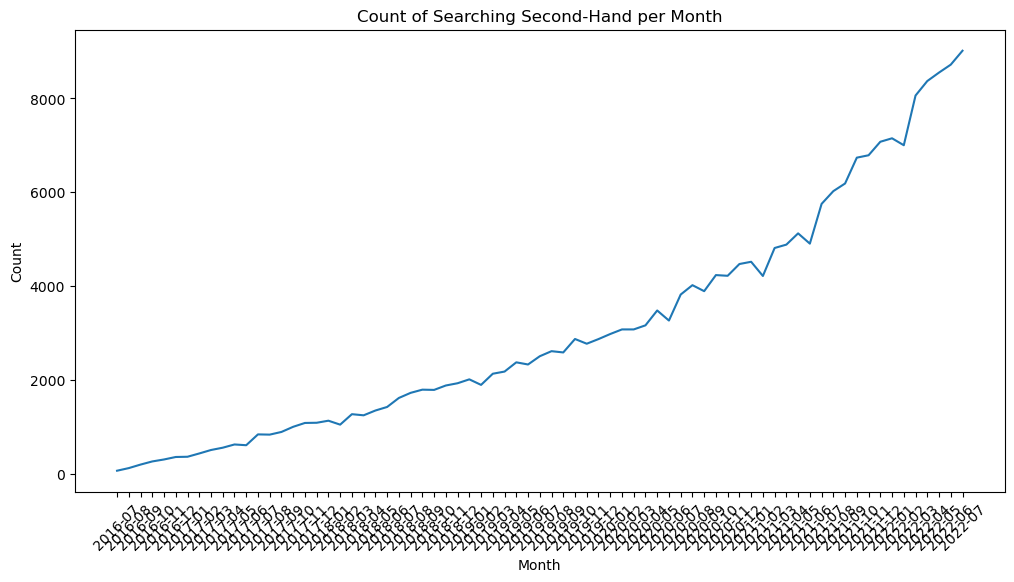

In [17]:
# 월별로 중고 검색 횟수 모아보기
plt.figure(figsize=(12, 6))
ax = sns.lineplot(temp_click_stream_new, x='month', y='second_hand_count')
# ax2 = ax.twinx()
# ax2 = sns.barplot(temp_click_stream_new, x='month', y='ratio_second_hand', ax=ax2)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Searching Second-Hand per Month')
plt.xticks(rotation=45)
plt.show()

##### 구매로 이어진(구매시도까지 이어진) 검색어 탐색

In [18]:
click_stream_new = click_stream_new.sort_values(by='event_time')

In [19]:
click_stream_new.payment_status.unique()

array([nan,  1.,  0.])

In [20]:
click_stream_new.head()

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,month
12371556,607d864b-76b5-45a1-a45d-7fb666a03ea1,HOMEPAGE,2016-06-30 22:59:36.254358+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,2016-06
12371559,607d864b-76b5-45a1-a45d-7fb666a03ea1,SCROLL,2016-06-30 23:01:06.254358+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,2016-06
12371557,607d864b-76b5-45a1-a45d-7fb666a03ea1,ADD_TO_CART,2016-06-30 23:01:14.254358+00:00,MOBILE,33314.0,3,210265,NaN,NaN,0.0,0,2016-06
12371560,607d864b-76b5-45a1-a45d-7fb666a03ea1,CLICK,2016-06-30 23:02:35.254358+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,2016-06
12371561,607d864b-76b5-45a1-a45d-7fb666a03ea1,SCROLL,2016-06-30 23:03:56.254358+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,2016-06


In [21]:
# 추후 session 정보가 생기면 더 자세하게 진행
print(f'session_id 유니크값: {click_stream_new.session_id.nunique()}')

print(f"session_id 값들 중 검색을 한 session_id 수: {click_stream_new[click_stream_new.event_name == 'SEARCH']['session_id'].nunique()}")

print(f"session_id 중 검색이 포함된 session_id 비율: {round(click_stream_new[click_stream_new.event_name == 'SEARCH']['session_id'].nunique()/click_stream_new.session_id.nunique() * 100, 2)}%")
num_search = len(click_stream_new[click_stream_new['event_name'] == 'SEARCH'])

print(f'검색 횟수: {num_search}')

session_id 유니크값: 895203
session_id 값들 중 검색을 한 session_id 수: 490846
session_id 중 검색이 포함된 session_id 비율: 54.83%
검색 횟수: 1173266


In [22]:
# T-Shirt -> Tshirts(articleType)
# Shoes, Adidas Shoes, Nike Shoes -> Shoes
# Woman's Bag, Work Bag -> Bags
# Dress -> Dress
# Sandal -> Sandas
# Shirts -> shirts
# Trousers -> trousers(articleType)
# Pajamas, House Dress -> Loungewear and Nightwear
# Hat -> Hat(articleType)

In [23]:
# click_trans_df = pd.merge(click_stream_new, transaction_df[['session_id', 'event_time', 'product_id']], how='left', on=['session_id', 'event_time'])
# x = click_trans_df.product_id_x
# y = click_trans_df.product_id_y
# z = x.fillna(0)+y.fillna(0)
# z = z.replace(0, np.nan)

# click_trans_df.product_id_x = z
# click_trans_df.rename(columns={'product_id_x':'product_id'}, inplace=True)
# click_trans_df.drop('product_id_y', axis=1, inplace=True)
# click_trans_df.head()

In [24]:
# cnt = 0

# temp = click_stream_new[click_stream_new.session_id == '98e66f53-f24f-4238-8c9c-34a0482e22d5'].reset_index(drop=True)
# search_idx = temp[temp['event_name'] == 'SEARCH'].index
# # search_dict = {idx:temp.loc[idx]['search_keywords'] for idx in search_idx}
# trans_idx = temp[(temp['event_name'] == 'ADD_TO_CART') | (temp['event_name'] == 'BOOKING')].index

# for i in search_idx:
#     filtered_idx = trans_idx[trans_idx > i]
#     filtered_ = [temp.iloc[i] for i in filtered_idx]
#     if temp.iloc[i] in filtered_:
#         cnt += 1


# 3. 회원가입 후 첫 구매까지의 기간 분석

### 결론 
1. 회원가입 후 구매까지 이어지는 비율 50.7% -> 회원가입을 했다는 것을 구매하고 싶은 상품이 있었다는 이야기지만 구매로 이어지지 않았다는게 문제(이유..?)
2. 회원가입한 사람 중 당일 구매한 사람 비율 : 46% -> 일반적으로 60%가 구매함(나래님 자료), 첫 구매 유도를 잘 하지 못한것이 문제
 

In [25]:
customer.head()

,customer_id,gender,birthdate,home_location,first_join_date,age_join,age_now
0,2870,F,1996-06-14,Sumatera Barat,2019-07-21,23,26
1,8193,F,1993-08-16,Jakarta Raya,2017-07-16,24,29
2,7279,M,1989-01-23,Nusa Tenggara Barat,2020-08-23,31,33
3,88813,M,1991-01-05,Kalimantan Timur,2021-10-03,30,31
4,82542,M,2000-07-15,Kalimantan Selatan,2021-04-11,21,22


In [26]:
transaction_new = transaction_new.sort_values(by='created_at')
transaction_new.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,total_amount,product_id,quantity,item_price,with_promo
1254461,2016-06-30 23:18:44.792905+00:00,74089,2dd76c45-6ddb-46b4-9c91-c59d4f9b76ba,607d864b-76b5-45a1-a45d-7fb666a03ea1,LinkAja,1,0,0.0,10000,640795,33314,3,210265,0
1201589,2016-07-01 02:53:26.720195+00:00,6183,b9724455-552e-4deb-9351-4a4fe4ee0b8f,c5d3792d-9220-47db-ad80-4932f3f88d0e,OVO,1,6053,4.0,10000,578826,16061,1,163539,1
1201590,2016-07-01 02:53:26.720195+00:00,6183,b9724455-552e-4deb-9351-4a4fe4ee0b8f,c5d3792d-9220-47db-ad80-4932f3f88d0e,OVO,1,6053,4.0,10000,578826,7588,1,411340,1
1201721,2016-07-01 09:45:51.803842+00:00,16228,8035f5b3-2a7c-4e30-ab4a-9b3091edc37f,bbff775e-4166-46aa-bbfd-4ba6465add17,Debit Card,1,0,0.0,15000,333792,47650,1,318792,0
1254460,2016-07-01 22:32:45.218400+00:00,73773,5f390336-0a5f-4e0d-bfe1-df080269ce45,8f385c80-1b70-4861-80ac-5eb3b5620fee,Debit Card,1,0,0.0,10000,256670,32185,1,246670,0


In [27]:
# customer_id 별 최초 거래 일시 추출
first_transaction = transaction_new.groupby('customer_id')['created_at'].min()
first_transaction

customer_id
3        2018-08-25 18:54:03.844494+00:00
8        2021-02-13 09:47:39.656991+00:00
9        2021-06-27 01:51:48.421034+00:00
11       2022-03-07 14:29:13.759159+00:00
15       2019-09-30 04:47:36.105040+00:00
                       ...               
99992    2020-06-30 21:03:37.873510+00:00
99995    2020-08-19 09:50:48.810263+00:00
99997    2020-04-25 18:38:16.825127+00:00
99998    2018-07-02 20:56:19.703960+00:00
99999    2016-10-12 19:22:21.166237+00:00
Name: created_at, Length: 50705, dtype: object

In [28]:
# customer_id 별 최초 거래 일시 정보를 customer 테이블과 병합
merge_customer = pd.merge(customer, first_transaction, how='left', on='customer_id')
merge_customer.head()

,customer_id,gender,birthdate,home_location,first_join_date,age_join,age_now,created_at
0,2870,F,1996-06-14,Sumatera Barat,2019-07-21,23,26,NaN
1,8193,F,1993-08-16,Jakarta Raya,2017-07-16,24,29,NaN
2,7279,M,1989-01-23,Nusa Tenggara Barat,2020-08-23,31,33,2020-08-23 12:53:12.916342+00:00
3,88813,M,1991-01-05,Kalimantan Timur,2021-10-03,30,31,NaN
4,82542,M,2000-07-15,Kalimantan Selatan,2021-04-11,21,22,2021-04-16 09:20:03.134253+00:00


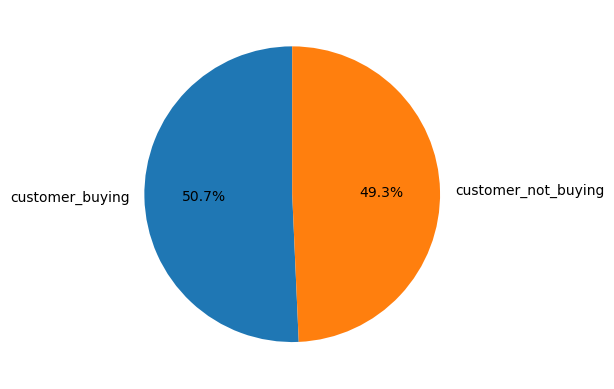

In [29]:
# 회원가입한 고객 중 구매경험이 있는 고객 비율
join_customer_buy_ratio = len(merge_customer[merge_customer.created_at.notnull()])/len(merge_customer)
labels = ['customer_buying', 'customer_not_buying']
plt.pie([join_customer_buy_ratio, 1-join_customer_buy_ratio], startangle=90, labels=labels, autopct='%.1f%%')
plt.show()

In [30]:
# 회원가입 후 실제 구매한 고객들의 성별 비율
merge_customer[merge_customer.created_at.notnull()].gender.value_counts(normalize=True)

F    0.641909
M    0.358091
Name: gender, dtype: float64

In [31]:
# 첫 구매일자 정보 데이터 타입 변환
merge_customer.created_at = pd.to_datetime(merge_customer.created_at).dt.date
merge_customer.created_at = pd.to_datetime(merge_customer.created_at)
merge_customer.first_join_date = pd.to_datetime(merge_customer.first_join_date)
merge_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   customer_id      100000 non-null  int64         
 1   gender           100000 non-null  object        
 2   birthdate        100000 non-null  object        
 3   home_location    100000 non-null  object        
 4   first_join_date  100000 non-null  datetime64[ns]
 5   age_join         100000 non-null  int64         
 6   age_now          100000 non-null  int64         
 7   created_at       50705 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 6.9+ MB


In [32]:
merge_customer.head()

,customer_id,gender,birthdate,home_location,first_join_date,age_join,age_now,created_at
0,2870,F,1996-06-14,Sumatera Barat,2019-07-21,23,26,NaT
1,8193,F,1993-08-16,Jakarta Raya,2017-07-16,24,29,NaT
2,7279,M,1989-01-23,Nusa Tenggara Barat,2020-08-23,31,33,2020-08-23
3,88813,M,1991-01-05,Kalimantan Timur,2021-10-03,30,31,NaT
4,82542,M,2000-07-15,Kalimantan Selatan,2021-04-11,21,22,2021-04-16


In [33]:
# 회원가입 당일 구입한 비율: 46.2%
period_buy_after_join = (merge_customer.created_at - merge_customer.first_join_date)
print(len(period_buy_after_join[period_buy_after_join == '0 days']) / period_buy_after_join.notnull().sum())


0.46222266048713145


In [34]:
# 회원가입 후 구매까지 이어지는 기간 통계 정보
period_buy_after_join[period_buy_after_join.notnull()].describe()

count                        50705
mean     1 days 00:43:54.343753081
std      1 days 11:17:17.317556473
min                0 days 00:00:00
25%                0 days 00:00:00
50%                1 days 00:00:00
75%                1 days 00:00:00
max               15 days 00:00:00
dtype: object

In [68]:
# 회원가입 후 1일 이내에 구매하는 소비자 비율
print(len(period_buy_after_join[(period_buy_after_join == '0 days') | (period_buy_after_join == '1 days')]) / period_buy_after_join.notnull().sum())

0.7714032146731091


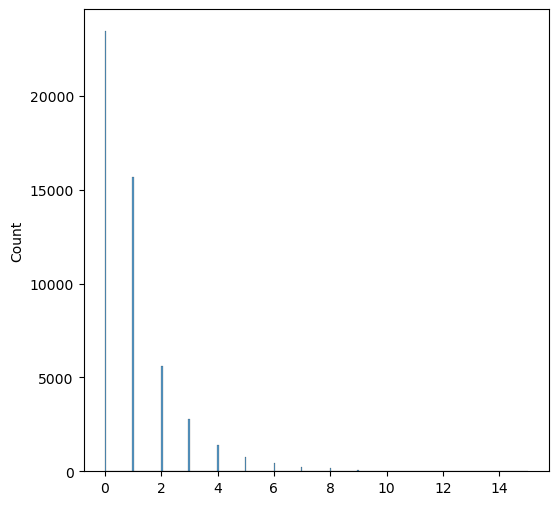

In [35]:
# 분포를 확인했을 때 대부분 회원가입 후 1일 이내 구매
plt.figure(figsize=(6,6))
sns.histplot(period_buy_after_join[period_buy_after_join.notnull()].dt.days)
plt.show()

# 4. 재구매율, 전체 구매 데이터 기준으로, 재구매자가 며칠 이내 재구매인지 확인

##### 재구매 고객 대상 재구매기간 분석

In [38]:
transaction_new.created_at = pd.to_datetime(transaction_new.created_at)

In [221]:
# 재구매 행위 기간 통계 자료

temp = transaction_new.copy()
# customer_id, created_at 기준 정렬
temp = temp.sort_values(by=['customer_id', 'created_at'])

# 구매 행위 간 시간 차이 열 생성
temp['difference'] = temp.groupby(['customer_id'])['created_at'].diff()

# 시간 차이가 0 days 00:00:00 으로 나타나는 데이터 제거
# 같은 booking_id에서 여러개의 상품을 결제하였을 경우 하나의 거래로 보기 위함 -> 아래 코드가 들어가야 할까요..?
temp.loc[temp['difference'] == pd.Timedelta(days=0), 'difference'] = pd.NaT

temp.difference.describe()

count                        801879
mean     43 days 01:24:13.485106854
std      72 days 22:05:00.746146429
min                 0 days 00:00:18
25%                11 days 00:30:35
50%                21 days 00:13:35
75%                43 days 23:53:48
max              1109 days 23:27:29
Name: difference, dtype: object

In [222]:
temp[temp.customer_id.isin([20, 100])].head(10)

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,total_amount,product_id,quantity,item_price,with_promo,difference
1129443,2021-11-08 07:00:42.615854+00:00,20,eefd00ad-4776-40f3-b142-02fc74133e2b,5e304ae6-e7d3-4161-8c84-2e41b521911c,OVO,1,0,0.0,10000,1246395,20599,1,333755,0,NaT
1129444,2021-11-08 07:00:42.615854+00:00,20,eefd00ad-4776-40f3-b142-02fc74133e2b,5e304ae6-e7d3-4161-8c84-2e41b521911c,OVO,1,0,0.0,10000,1246395,19243,1,176295,0,NaT
1129442,2021-11-08 07:00:42.615854+00:00,20,eefd00ad-4776-40f3-b142-02fc74133e2b,5e304ae6-e7d3-4161-8c84-2e41b521911c,OVO,1,0,0.0,10000,1246395,52604,1,323959,0,NaT
1129445,2021-11-08 07:00:42.615854+00:00,20,eefd00ad-4776-40f3-b142-02fc74133e2b,5e304ae6-e7d3-4161-8c84-2e41b521911c,OVO,1,0,0.0,10000,1246395,18724,1,402386,0,NaT
1129447,2021-11-13 07:09:52.615854+00:00,20,847f2048-d34b-4af7-87b9-89fb55f3c7dc,4c644eda-fbe9-4e26-898b-57e812752cfc,Credit Card,1,0,0.0,0,2552996,12747,9,257306,0,5 days 00:09:10
1129446,2021-11-13 07:09:52.615854+00:00,20,847f2048-d34b-4af7-87b9-89fb55f3c7dc,4c644eda-fbe9-4e26-898b-57e812752cfc,Credit Card,1,0,0.0,0,2552996,12974,1,237242,0,NaT
1129448,2021-11-18 07:14:23.615854+00:00,20,ef99ffe2-5428-40f6-82ab-8bd052305718,6da3547e-0938-4265-a411-38c6bde19b1c,Credit Card,1,5006,4.0,10000,838190,45918,4,208299,1,5 days 00:04:31
1129449,2021-11-23 07:24:45.615854+00:00,20,ae98a0c7-39df-4873-8266-16ca905a29a1,ea3c4886-3515-4d94-a3c9-d9e0043a3ab0,OVO,1,0,0.0,0,1059576,36493,4,264894,0,5 days 00:10:22
1129450,2021-11-28 07:25:33.615854+00:00,20,f2955c78-a05c-4741-a918-069c34ce2e03,1af3e1d8-c4b1-4f45-b706-23e27ced0cb0,OVO,1,0,0.0,10000,257726,24390,1,247726,0,5 days 00:00:48
1129451,2021-12-03 07:33:22.615854+00:00,20,5ffec7ca-7232-4a63-9fee-90f11bb66ed5,691c7ef5-2324-4ffe-ae33-41b66422ca46,OVO,1,0,0.0,0,1065005,56266,5,213001,0,5 days 00:07:49


In [223]:
temp[temp['customer_id'] == 11]

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,total_amount,product_id,quantity,item_price,with_promo,difference
908287,2022-03-07 14:29:13.759159+00:00,11,b1961c47-95a6-4375-9ee2-12ffa4d39d05,5f20fb20-8e35-4e30-a9d9-fc6a07d7835c,OVO,1,9492,4.0,15000,197533,21536,1,192025,1,NaT


##### 구매 횟수 기준 그룹 분할 및 행동 패턴 분석

In [164]:
# 구매 횟수 통계 자료
purchase_cnt = temp.groupby(['customer_id'])['booking_id'].count()
purchase_cnt.describe()

count    50705.000000
mean        24.742826
std         44.196931
min          1.000000
25%          2.000000
50%          8.000000
75%         27.000000
max        807.000000
Name: booking_id, dtype: float64

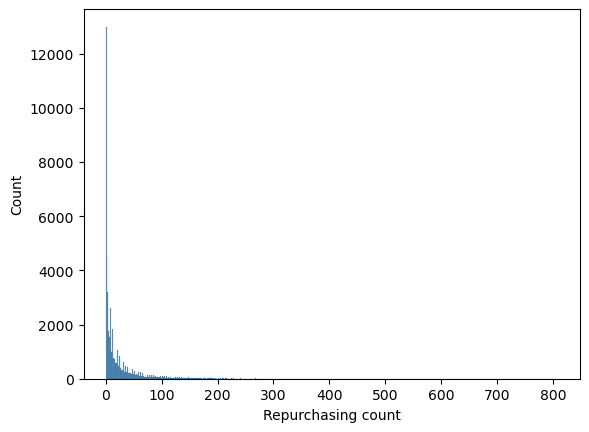

In [112]:
sns.histplot(purchase_cnt)
plt.xlabel('purchasing count')
plt.show()

In [ ]:
# 그룹 분할
# 1번만 구매한 고객 (16.7%)
# 2 ~ 8 (33.5%)
# 9 ~ 27 (25.2%)
# 28 ~ 807 (24.5%)

# 비율 계산에 사용한 코드
ratio = 0
for i in range(2, 9):
    try:
        ratio += purchase_cnt.value_counts(normalize=True)[i]
    except KeyError:
        continue
ratio

1번 구매한 고객들

In [180]:
# 1번만 구매한 고객들
purchase_cnt[purchase_cnt == 1].index

Int64Index([   11,    21,    40,   120,   165,   181,   194,   195,   207,
              210,
            ...
            99905, 99924, 99929, 99932, 99950, 99966, 99971, 99981, 99997,
            99999],
           dtype='int64', name='customer_id', length=8474)

In [190]:
customer_purchase_1 = customer[customer['customer_id'].isin(purchase_cnt[purchase_cnt == 1].index)]
customer_purchase_1.head()

,customer_id,gender,birthdate,home_location,first_join_date,age_join,age_now
4,82542,M,2000-07-15,Kalimantan Selatan,2021-04-11,21,22
31,87704,F,2009-07-17,Sulawesi Utara,2021-11-07,12,13
58,7168,F,1989-03-31,Jakarta Raya,2017-07-29,28,33
67,44043,M,2004-09-21,Lampung,2019-10-13,15,18
90,14227,F,1996-10-29,Lampung,2021-12-04,25,26


In [206]:
trans_purchase_1 = transaction_new[transaction_new['customer_id'].isin(purchase_cnt[purchase_cnt == 1].index)]
trans_purchase_1.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,total_amount,product_id,quantity,item_price,with_promo
1254460,2016-07-01 22:32:45.218400+00:00,73773,5f390336-0a5f-4e0d-bfe1-df080269ce45,8f385c80-1b70-4861-80ac-5eb3b5620fee,Debit Card,1,0,0.0,10000,256670,32185,1,246670,0
1227432,2016-07-02 20:01:04.996529+00:00,30771,27c08004-141d-4ee8-bf88-63224906e52d,54a40fd2-7446-40b6-97a4-b51600d5df54,Credit Card,1,5272,3.0,5000,199897,18092,1,200169,1
817471,2016-07-03 16:25:01.401472+00:00,67563,34fe80aa-7fe8-4da2-aa19-68a0c8c073b8,2a6aa94f-0b0d-42ce-8615-619cc437dd0c,Gopay,1,0,0.0,10000,996610,47432,3,328870,0
1227363,2016-07-04 00:58:13.525069+00:00,22844,de1de31a-b71a-4afd-8eec-9946f398b441,8bcd8c49-fe5d-4121-b967-b3964b537c30,Gopay,1,5952,1.0,10000,215548,25047,1,211500,1
1097795,2016-07-04 18:10:42.766218+00:00,9914,8714130c-06b7-491d-a58a-edf384a77bba,2cb5c61d-a740-472f-92c8-c777e636fc6a,Credit Card,1,6060,1.0,15000,336925,43464,1,327985,1


In [214]:
merge_cust_trans_1 = pd.merge(customer_purchase_1, trans_purchase_1, how='inner', on='customer_id')
merge_cust_trans_1.head()

,customer_id,gender,birthdate,home_location,first_join_date,age_join,age_now,created_at,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,total_amount,product_id,quantity,item_price,with_promo
0,82542,M,2000-07-15,Kalimantan Selatan,2021-04-11,21,22,2021-04-16 09:20:03.134253+00:00,71d9dae3-d587-4d46-b652-aead7d143e49,9b376c3b-c4bc-4a03-bdb9-2925f2cc3a00,OVO,1,0,0.0,0,115702,18881,1,115702,0
1,87704,F,2009-07-17,Sulawesi Utara,2021-11-07,12,13,2021-11-08 02:20:17.566442+00:00,9b112bea-5e01-4dc1-92db-18b9df7abace,15634dc6-c6fe-4f5c-93b0-d830ba7384b0,Debit Card,1,0,0.0,5000,2086262,17752,6,346877,0
2,7168,F,1989-03-31,Jakarta Raya,2017-07-29,28,33,2017-07-29 21:53:27.476620+00:00,75e687e1-f656-4d5b-a67a-414625ad1a36,4646fd3d-eb8b-4a7d-b572-53d3d617c313,Credit Card,1,0,0.0,15000,386426,39275,1,371426,0
3,44043,M,2004-09-21,Lampung,2019-10-13,15,18,2019-10-13 15:07:31.516388+00:00,2b04bbd8-bcae-4c39-bb9e-0e0ac59ce9a8,a2bc5112-a758-4bb6-ae82-357cba1ecdd4,Credit Card,1,2173,3.0,0,267310,10429,1,269483,1
4,14227,F,1996-10-29,Lampung,2021-12-04,25,26,2021-12-06 12:13:28.716352+00:00,877b3009-c5b5-48c6-9e86-63d23a18e7d8,98a16d77-3874-46c6-9f61-be3dea837b3c,Gopay,1,993,1.0,0,327422,3425,1,328415,1


<Axes: xlabel='age_join', ylabel='Count'>

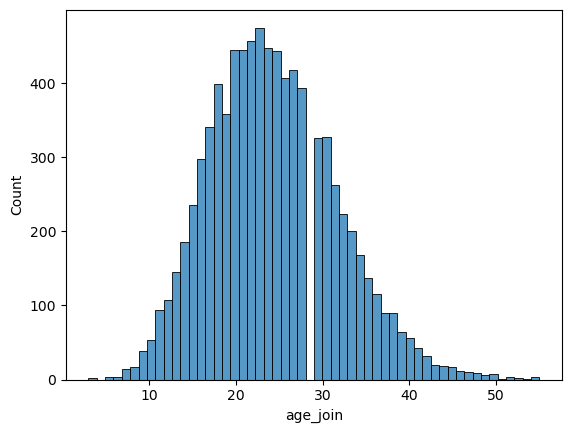

In [211]:
sns.histplot(data = merge_cust_trans_1, x='age_join')

In [212]:
merge_cust_trans_1.gender.value_counts(normalize=True)

F    0.638659
M    0.361341
Name: gender, dtype: float64

In [229]:
purchase_cnt[(purchase_cnt <= 27)].index

Int64Index([    8,     9,    11,    15,    17,    21,    24,    26,    27,
               32,
            ...
            99978, 99980, 99981, 99985, 99989, 99991, 99992, 99997, 99998,
            99999],
           dtype='int64', name='customer_id', length=38269)

In [235]:
# 프로모션 -> booking id 고려해서 다시 짜기
transaction_new[transaction_new['customer_id'].isin(purchase_cnt[(purchase_cnt <= 1)].index)].with_promo.value_counts(normalize=True)

0    0.645032
1    0.354968
Name: with_promo, dtype: float64

In [197]:
click_purchase_1 = click_stream_new[click_stream_new['session_id'].isin(trans_purchase_1['session_id'])]
click_purchase_1.head(10)

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,month
11874859,8f385c80-1b70-4861-80ac-5eb3b5620fee,HOMEPAGE,2016-07-01 21:58:10.392355+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,2016-07
11874860,8f385c80-1b70-4861-80ac-5eb3b5620fee,ADD_TO_CART,2016-07-01 22:04:52.392355+00:00,MOBILE,32185.0,1,246670,NaN,NaN,0.0,0,2016-07
11874862,8f385c80-1b70-4861-80ac-5eb3b5620fee,SCROLL,2016-07-01 22:05:38.392355+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,2016-07
11874863,8f385c80-1b70-4861-80ac-5eb3b5620fee,PROMO_PAGE,2016-07-01 22:12:58.392355+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,2016-07
11874864,8f385c80-1b70-4861-80ac-5eb3b5620fee,PROMO_PAGE,2016-07-01 22:19:33.392355+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,2016-07
11874861,8f385c80-1b70-4861-80ac-5eb3b5620fee,BOOKING,2016-07-01 22:32:45.218400+00:00,MOBILE,NaN,0,0,1.0,NaN,0.0,0,2016-07
12730014,54a40fd2-7446-40b6-97a4-b51600d5df54,HOMEPAGE,2016-07-02 19:29:55.632760+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,2016-07
12730015,54a40fd2-7446-40b6-97a4-b51600d5df54,ADD_TO_CART,2016-07-02 19:31:12.632760+00:00,MOBILE,18092.0,1,200169,NaN,NaN,0.0,0,2016-07
12730018,54a40fd2-7446-40b6-97a4-b51600d5df54,SEARCH,2016-07-02 19:31:28.632760+00:00,MOBILE,NaN,0,0,NaN,Dress,0.0,0,2016-07
12730016,54a40fd2-7446-40b6-97a4-b51600d5df54,ADD_PROMO,2016-07-02 19:32:29.632760+00:00,MOBILE,NaN,0,0,NaN,NaN,3.0,5272,2016-07


In [182]:
click_stream_new.head()

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,month
12371556,607d864b-76b5-45a1-a45d-7fb666a03ea1,HOMEPAGE,2016-06-30 22:59:36.254358+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,2016-06
12371559,607d864b-76b5-45a1-a45d-7fb666a03ea1,SCROLL,2016-06-30 23:01:06.254358+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,2016-06
12371557,607d864b-76b5-45a1-a45d-7fb666a03ea1,ADD_TO_CART,2016-06-30 23:01:14.254358+00:00,MOBILE,33314.0,3,210265,NaN,NaN,0.0,0,2016-06
12371560,607d864b-76b5-45a1-a45d-7fb666a03ea1,CLICK,2016-06-30 23:02:35.254358+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,2016-06
12371561,607d864b-76b5-45a1-a45d-7fb666a03ea1,SCROLL,2016-06-30 23:03:56.254358+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,2016-06
